## Exploratory Data Analysis (EDA)
## 1.Load and Inspect Data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette('pastel')

df = pd.read_csv('hr_employee_attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2.Understand Data Structure

In [50]:
df.info()
df.describe()
df.isnull().sum()
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## 3.Univariate Analysis

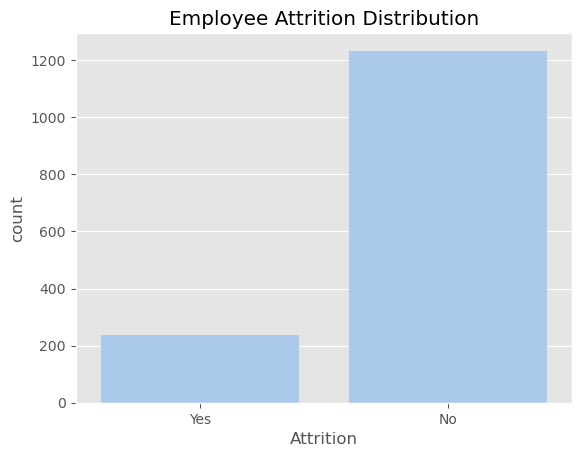

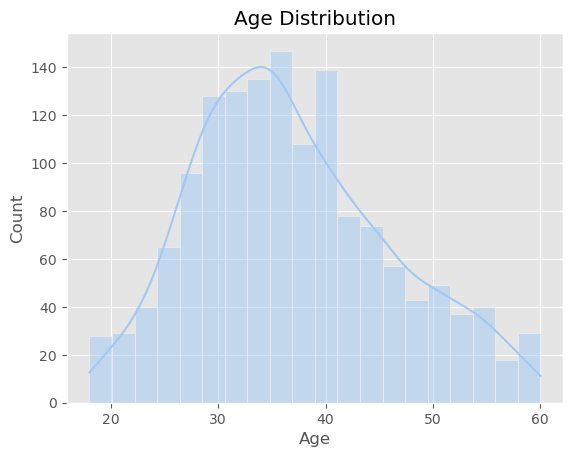

In [8]:
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Distribution')
plt.show()

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


## 4.Bivariate Insights

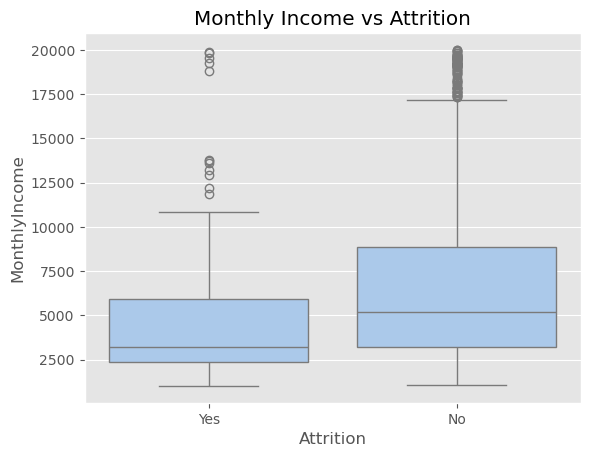

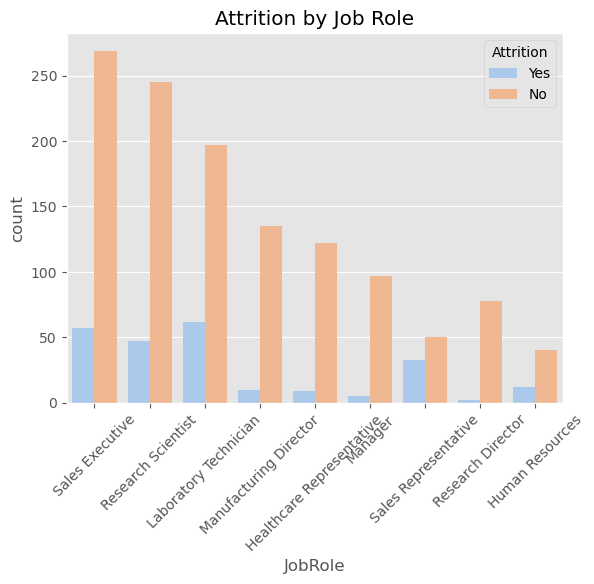

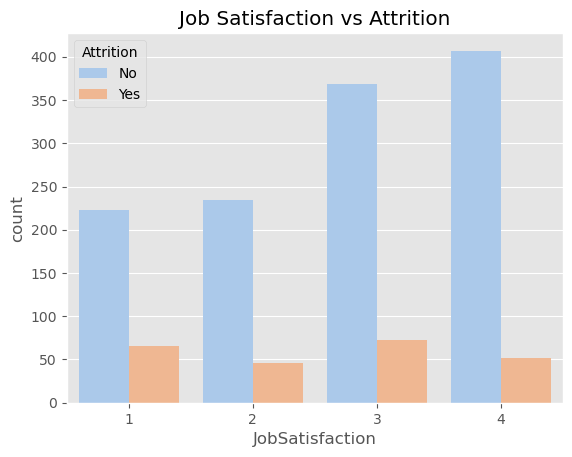

In [9]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()


## 5.Correlation Heatmap

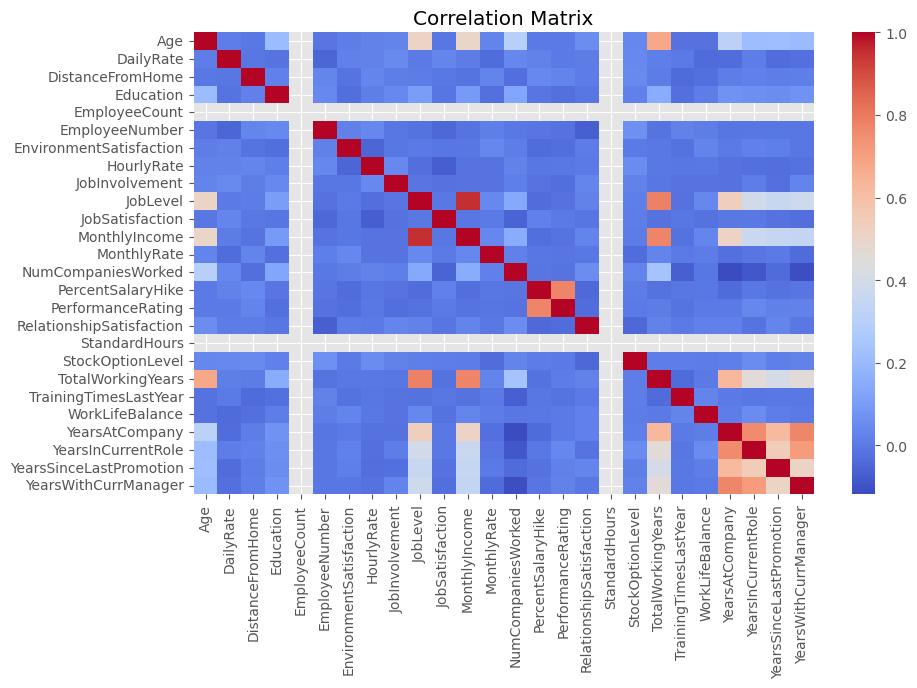

In [13]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

## 6.Feature Encoding (Convert Categorical → Numeric)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes→1, No→0

for col in df.select_dtypes('object'):
    df[col] = le.fit_transform(df[col])


## 7.Split Train/Test

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building & Evaluation
## 1.Train a Few Models

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest (scaling not needed)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.891156462585034
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Random Forest Accuracy: 0.8673469387755102


## 2.Feature Importance (Top Attrition Drivers)

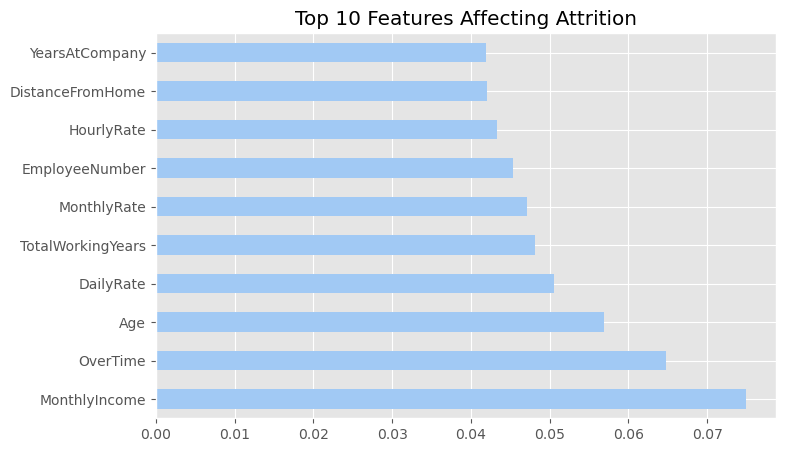

In [18]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Features Affecting Attrition')
plt.show()


## Prepare Summary Data for Dashboard
## Export Summary Data for Dashboard

In [51]:
# Convert Attrition column to numeric flag
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# Now you can check both
df[['Attrition', 'Attrition_Flag']].head()


# 1. Attrition by Department
dept_attrition = df.groupby('Department')['Attrition_Flag'].mean().reset_index()
dept_attrition.rename(columns={'Attrition_Flag': 'Attrition_Rate'}, inplace=True)
dept_attrition['Attrition_Rate'] = dept_attrition['Attrition_Rate'] * 100
dept_attrition.to_csv('attrition_by_department.csv', index=False)

# 2. Attrition by Job Role
job_attrition = df.groupby('JobRole')['Attrition_Flag'].mean().reset_index()
job_attrition.rename(columns={'Attrition_Flag': 'Attrition_Rate'}, inplace=True)
job_attrition['Attrition_Rate'] = job_attrition['Attrition_Rate'] * 100
job_attrition.to_csv('attrition_by_jobrole.csv', index=False)

# 3. Attrition by Gender
gender_attrition = df.groupby('Gender')['Attrition_Flag'].mean().reset_index()
gender_attrition.rename(columns={'Attrition_Flag': 'Attrition_Rate'}, inplace=True)
gender_attrition['Attrition_Rate'] = gender_attrition['Attrition_Rate'] * 100
gender_attrition.to_csv('attrition_by_gender.csv', index=False)

# 4. Attrition by Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[18,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56-65'])
age_attrition = df.groupby('Age_Group',observed=False)['Attrition_Flag'].mean().reset_index()
age_attrition.rename(columns={'Attrition_Flag': 'Attrition_Rate'}, inplace=True)
age_attrition['Attrition_Rate'] = age_attrition['Attrition_Rate'] * 100
age_attrition.to_csv('attrition_by_age.csv', index=False)
